# Variational Autoencoder

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

In [78]:
import sys
print (sys.version)

3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import importlib
import pandas as pd
from scipy.stats import bernoulli
from matplotlib import cm
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot
import random

import generative_lib

In [80]:
importlib.reload(generative_lib)

<module 'generative_lib' from '/Users/joriococola/Desktop/CS 6140/project 6140/GitHub/CS6140_LatentClassify/ipython notebooks/generative_lib.py'>

In [81]:
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

## Setting

In [116]:
# Dataset
random_seed = 123
DOWNLOAD = True
SHUFFLE_TR = True
SHUFFLE_TS = False

# Architecture
num_features = 784
num_hidden_1 = 500
num_latent = 15

device = "cpu"

# Training
learning_rate = 0.001
num_epochs = 6
batch_size = 28

## MNIST DATASET

In [117]:
# Note transforms.ToTensor() scales input images to 0-1 range
train_dataset = datasets.FashionMNIST(root='data2', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=DOWNLOAD)

test_dataset = datasets.FashionMNIST(root='data2', 
                              train=False, 
                              transform=transforms.ToTensor())

Processing...
Done!


In [118]:
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=SHUFFLE_TR)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=SHUFFLE_TS)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([28, 1, 28, 28])
Image label dimensions: torch.Size([28])


## Model

In [119]:
torch.manual_seed(random_seed)
model = generative_lib.VAE(num_features, num_hidden_1, num_latent)

## COST AND OPTIMIZER

In [120]:
model = model.to("cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

## Training

In [121]:
for epoch in range(num_epochs):
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        # don't need labels, only the images (features)
        features = features.view(-1, 28*28)

        ### FORWARD AND BACK PROP
        z_mean, z_log_var, encoded, decoded = model(features)

        # cost = reconstruction loss + Kullback-Leibler divergence
        kl_divergence = (0.5 * (z_mean**2 + 
                                torch.exp(z_log_var) - z_log_var - 1)).sum()
        pixelwise_bce = F.binary_cross_entropy(decoded, features, size_average=False)
        cost = kl_divergence + pixelwise_bce
        
        optimizer.zero_grad()
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_dataset)//batch_size, cost))

Epoch: 001/006 | Batch 000/2142 | Cost: 15494.8496
Epoch: 001/006 | Batch 050/2142 | Cost: 8723.1357
Epoch: 001/006 | Batch 100/2142 | Cost: 9044.9561
Epoch: 001/006 | Batch 150/2142 | Cost: 8742.3867
Epoch: 001/006 | Batch 200/2142 | Cost: 7493.7505
Epoch: 001/006 | Batch 250/2142 | Cost: 6686.1738
Epoch: 001/006 | Batch 300/2142 | Cost: 8497.6533
Epoch: 001/006 | Batch 350/2142 | Cost: 7460.3701
Epoch: 001/006 | Batch 400/2142 | Cost: 7093.2852
Epoch: 001/006 | Batch 450/2142 | Cost: 7634.7915
Epoch: 001/006 | Batch 500/2142 | Cost: 7293.7021
Epoch: 001/006 | Batch 550/2142 | Cost: 7169.8940
Epoch: 001/006 | Batch 600/2142 | Cost: 7570.3438
Epoch: 001/006 | Batch 650/2142 | Cost: 7664.7900
Epoch: 001/006 | Batch 700/2142 | Cost: 7028.7520
Epoch: 001/006 | Batch 750/2142 | Cost: 7240.1685
Epoch: 001/006 | Batch 800/2142 | Cost: 7283.7339
Epoch: 001/006 | Batch 850/2142 | Cost: 7131.3418
Epoch: 001/006 | Batch 900/2142 | Cost: 7342.2622
Epoch: 001/006 | Batch 950/2142 | Cost: 7072.0674

Epoch: 004/006 | Batch 1700/2142 | Cost: 6564.4927
Epoch: 004/006 | Batch 1750/2142 | Cost: 6934.0786
Epoch: 004/006 | Batch 1800/2142 | Cost: 7117.3472
Epoch: 004/006 | Batch 1850/2142 | Cost: 6472.4160
Epoch: 004/006 | Batch 1900/2142 | Cost: 6721.6289
Epoch: 004/006 | Batch 1950/2142 | Cost: 6261.3755
Epoch: 004/006 | Batch 2000/2142 | Cost: 6841.9487
Epoch: 004/006 | Batch 2050/2142 | Cost: 6705.4331
Epoch: 004/006 | Batch 2100/2142 | Cost: 6635.4424
Epoch: 005/006 | Batch 000/2142 | Cost: 6129.7705
Epoch: 005/006 | Batch 050/2142 | Cost: 6925.8081
Epoch: 005/006 | Batch 100/2142 | Cost: 6642.2236
Epoch: 005/006 | Batch 150/2142 | Cost: 7045.8228
Epoch: 005/006 | Batch 200/2142 | Cost: 6653.1523
Epoch: 005/006 | Batch 250/2142 | Cost: 6839.0776
Epoch: 005/006 | Batch 300/2142 | Cost: 7023.4595
Epoch: 005/006 | Batch 350/2142 | Cost: 6736.3120
Epoch: 005/006 | Batch 400/2142 | Cost: 6839.3760
Epoch: 005/006 | Batch 450/2142 | Cost: 6812.1357
Epoch: 005/006 | Batch 500/2142 | Cost: 6

## Evaluation

### Trainset

In [122]:
orig_images.shape

torch.Size([9, 784])

In [123]:
n_images = 9
image_width = 28

orig_images = features[:n_images]

# test of encoder/decoder 
[enc,z_mean,z_log_var] = model.encoder(orig_images)
dec = model.decoder(enc)

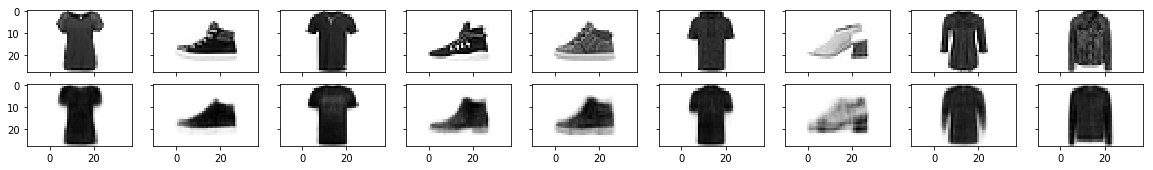

In [124]:
# reconstruction of train set
fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))

for i in range(n_images):
    for ax, img in zip(axes, [orig_images, dec]):
        ax[i].imshow(img[i].detach().reshape((image_width, image_width)), cmap='binary')

### Test set

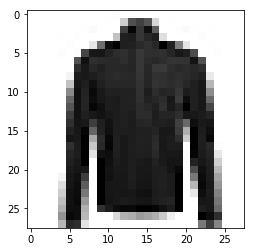

In [125]:
# Random img in the test set
test_img = test_dataset[random.randint(0, len(test_dataset))][0]
plt.imshow(test_img.reshape([image_width,image_width]),cmap='binary')

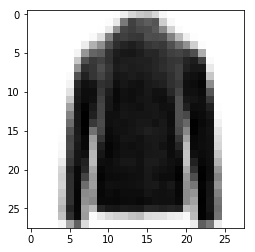

In [126]:
# Reconstruction using autoencoder
[test_enc,z_mean,z_log_var] = model.encoder(test_img.reshape([1,image_width*image_width]))
test_dec = model.decoder(test_enc).detach().numpy()

plt.imshow(test_dec.reshape([image_width,image_width]),cmap='binary')

## Latent Codes

In [127]:
batch_size = len(train_dataset)
batch_size_test = len(test_dataset)
SHUFFLE_TR = False
SHUFFLE_TS = False

Xtrain = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=SHUFFLE_TR)
Xtest = DataLoader(dataset=test_dataset, batch_size=batch_size_test, shuffle=SHUFFLE_TS)

In [128]:
for batch_idx, (features, targets_tr) in enumerate(Xtrain):
    features_tr = features.view(-1, 28*28)
print(batch_idx)

0


In [129]:
features_tr.shape

torch.Size([60000, 784])

In [130]:
[latent_tr,z_mean,z_log_var] = model.encoder(features_tr)
print(latent_tr.shape)
print(targets_tr.shape)

torch.Size([60000, 15])
torch.Size([60000])


In [131]:
for batch_idx, (features, targets_ts) in enumerate(Xtest):
    features_ts = features.view(-1, 28*28)
print(batch_idx)

0


In [132]:
[latent_ts,z_mean,z_log_var] = model.encoder(features_ts)
print(latent_ts.shape)
print(targets_ts.shape)

torch.Size([10000, 15])
torch.Size([10000])


In [133]:
torch.save(latent_tr, 'VAE_FMNIST-latent_tr.pth')
torch.save(latent_ts, 'VAE_FMNIST-latent_ts.pth')

torch.save(targets_tr, 'VAE_FMNIST-targets_tr.pth')
torch.save(targets_ts, 'VAE_FMNIST-targets_ts.pth')